load the dataset

In [4]:
import pandas as pd

# Load the dataset
data = pd.read_csv("Mall_customers.csv")

# Display the first few rows of the dataframe
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


data preprocessing

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv("Mall_Customers.csv")

# 1. Handling Missing Values (if any)
# Check for missing values
print(data.isnull().sum())

# No missing values found in this dataset, so no further action needed for this step

# 2. Encoding Categorical Variables (if any)
# There are no categorical variables in this dataset, so no further action needed for this step

# 3. Feature Scaling
# Scale the numerical features (e.g., Age, Annual Income, Spending Score) using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Replace the original numerical features with the scaled features in the DataFrame
data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaled_data

# 4. Feature Selection
# For clustering, you may want to exclude the CustomerID column as it likely doesn't provide useful information for clustering
data = data.drop(columns=['CustomerID'])

# Display the first few rows of the preprocessed dataframe
print(data.head())


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
   Gender       Age  Annual Income (k$)  Spending Score (1-100)
0    Male -0.767219           -1.414214               -0.312376
1    Male -0.610644           -1.414214                0.949142
2  Female -0.688931           -0.707107               -1.303568
3  Female -0.454068           -0.707107                0.828997
4  Female  0.172233            0.000000               -0.282340


feature selection

In [6]:
import pandas as pd

# Load the dataset
data = pd.read_csv("Mall_Customers.csv")

# Remove irrelevant features (e.g., CustomerID)
data = data.drop(columns=['CustomerID'])

# Select relevant features (e.g., Annual Income and Spending Score)
selected_features = ['Annual Income (k$)', 'Spending Score (1-100)']
data = data[selected_features]

# Display the first few rows of the dataframe after feature selection
print(data.head())


   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


choose the no of clusters

/Users/snehasambhajisalunkhe/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/snehasambhajisalunkhe/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/snehasambhajisalunkhe/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/snehasambhajisalunkhe/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412:

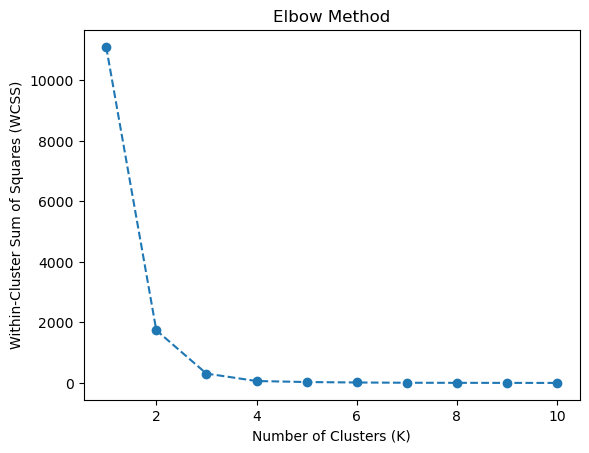

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Fit KMeans with different values of K and calculate WCSS
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()


apply k means algorithm

In [8]:
from sklearn.cluster import KMeans

# Assuming 'data' contains your preprocessed dataset and 'optimal_k' is the optimal number of clusters determined using one of the methods
optimal_k = 5  # Example value

# Apply K-means algorithm with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data)

# Assign cluster labels to each data point
cluster_labels = kmeans.labels_

# Add cluster labels to the original dataframe
data['Cluster'] = cluster_labels

# Display the first few rows of the dataframe with cluster labels
print(data.head())


   Annual Income (k$)  Spending Score (1-100)  Cluster
0                  15                      39        2
1                  15                      81        0
2                  16                       6        1
3                  16                      77        0
4                  17                      40        2


/Users/snehasambhajisalunkhe/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


visualise clusters

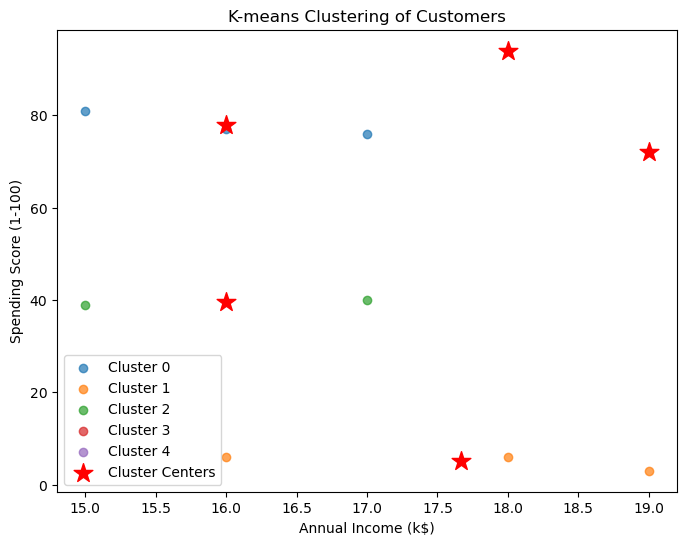

In [9]:
import matplotlib.pyplot as plt

# Visualize clusters
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    plt.scatter(data[data['Cluster'] == cluster]['Annual Income (k$)'],
                data[data['Cluster'] == cluster]['Spending Score (1-100)'],
                label=f'Cluster {cluster}', alpha=0.7)

# Plot cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, marker='*', c='red', label='Cluster Centers')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-means Clustering of Customers')
plt.legend()
plt.show()
